In [12]:
import pandas as pd

data = pd.read_csv("iris.data", names = ['a', 'b', 'c', 'd', 'label'])
data

,a,b,c,d,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
import torch

data_x = torch.from_numpy(data.iloc[:, :4].values)
data_y = data.iloc[:, 4]

X = data_x - data_x.mean(dim=0)
X

tensor([[-7.4333e-01,  4.4600e-01, -2.3587e+00, -9.9867e-01],
        [-9.4333e-01, -5.4000e-02, -2.3587e+00, -9.9867e-01],
        [-1.1433e+00,  1.4600e-01, -2.4587e+00, -9.9867e-01],
        [-1.2433e+00,  4.6000e-02, -2.2587e+00, -9.9867e-01],
        [-8.4333e-01,  5.4600e-01, -2.3587e+00, -9.9867e-01],
        [-4.4333e-01,  8.4600e-01, -2.0587e+00, -7.9867e-01],
        [-1.2433e+00,  3.4600e-01, -2.3587e+00, -8.9867e-01],
        [-8.4333e-01,  3.4600e-01, -2.2587e+00, -9.9867e-01],
        [-1.4433e+00, -1.5400e-01, -2.3587e+00, -9.9867e-01],
        [-9.4333e-01,  4.6000e-02, -2.2587e+00, -1.0987e+00],
        [-4.4333e-01,  6.4600e-01, -2.2587e+00, -9.9867e-01],
        [-1.0433e+00,  3.4600e-01, -2.1587e+00, -9.9867e-01],
        [-1.0433e+00, -5.4000e-02, -2.3587e+00, -1.0987e+00],
        [-1.5433e+00, -5.4000e-02, -2.6587e+00, -1.0987e+00],
        [-4.3333e-02,  9.4600e-01, -2.5587e+00, -9.9867e-01],
        [-1.4333e-01,  1.3460e+00, -2.2587e+00, -7.9867e-01],
        

In [13]:
def findPC(X):

  w = torch.randn(X.shape[1])
  w_size = (w * w).sum() ** 0.5
  w /= w_size

  lr = 0.1

  for epoch in range(100):
    w.requires_grad_(True)
    variance = -((X * w).sum(dim=1) ** 2).mean()

    variance.backward()

    with torch.no_grad():
      w = w - lr * w.grad
      w /= (w * w).sum() ** 0.5

  w.requires_grad_(False)
  
  return w, -variance.item()

w, v = findPC(X)
print(w, v)

tensor([ 0.3616, -0.0823,  0.8566,  0.3588]) 4.196675777435303


In [5]:
def PCA(k, X):
  vars = []
  pcs = []

  Z = X - X.mean(dim=0)

  for i in range(k):
    w, v = findPC(Z)

    pcs.append(w)
    vars.append(v)

    Z = Z - w * (Z * w).sum(dim=1).unsqueeze(1)
             
  return pcs, vars

pcs, vars = PCA(4, X)

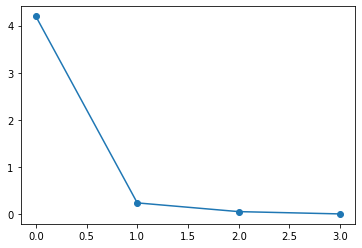

In [9]:
import matplotlib.pyplot as plt

plt.plot(vars, "-o")
plt.show()

In [14]:
X = torch.tensor(X, dtype=torch.float)
XX = X @ torch.stack(pcs[:2]).T

<ipython-input-14-2dafaf95f938>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


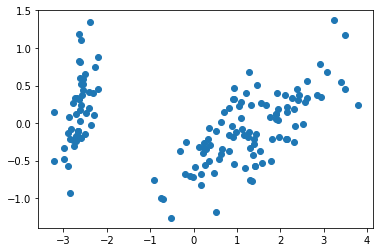

In [15]:
plt.scatter(XX[:, 0], XX[:, 1])
plt.show()

In [16]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
b = torch.tensor([6,7,8])
(a * b).sum(dim=1)

tensor([ 44, 107, 170])

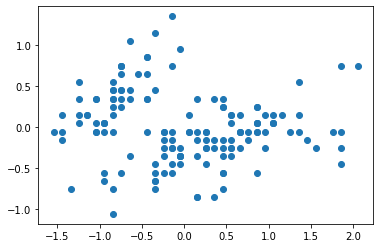

In [17]:
import matplotlib.pyplot as plt
data_xx = data_x - data_x.mean(dim=0)

plt.scatter(data_xx[:, 0], data_xx[:, 1])
plt.show()